In [ ]:
import tensorflow as tf

# uncomment to test if gpu is connected with tf

#device_name = tf.test.gpu_device_name()
#if device_name != '/device:GPU:0':
#  raise SystemError('GPU device not found')
#print('Found GPU at: {}'.format(device_name))
#

In [5]:
from fer import Video
from fer import FER
import os
import sys
import pandas as pd

# input any video
# record a short video to test live
location_videofile = "testC.mp4"

# Build the Face detection detector
face_detector = FER(mtcnn = True)
# Input the video for processing
input_video = Video(location_videofile)

# The Analyze() function will run analysis on every frame of the input video. 
# It will create a rectangular box around every image and show the emotion values next to that.
# Finally, the method will publish a new video that will have a box around the face of the human with live emotion values.
processing_data = input_video.analyze(face_detector, display=False)

INFO:fer:29.97 fps, 192 frames, 6.41 seconds
INFO:fer:Making directories at output
100%|███████████████████████████████████████████████████████████████████████████| 192/192 [03:18<00:00,  1.03s/frames]
INFO:fer:Completed analysis: saved to output\testC_output.mp4
INFO:fer:Starting to Zip
INFO:fer:Compressing: 26%
INFO:fer:Compressing: 52%
INFO:fer:Compressing: 78%
INFO:fer:Zip has finished


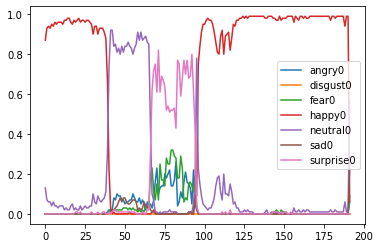

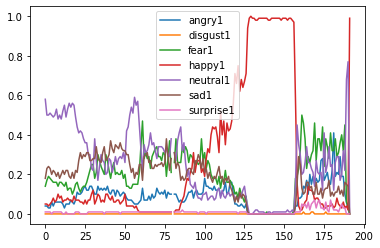

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

df = pd.read_csv('data.csv')
for column in df.columns[::2]:
    ax.plot(df[column], label = column)
leg = ax.legend()
plt.show()

fig, ax = plt.subplots()

df1 = pd.read_csv('data.csv')
for column in df1.columns[1::2]:
    ax.plot(df1[column], label = column)
leg = ax.legend()
plt.show()


In [15]:
df.columns

Index(['angry0', 'angry1', 'disgust0', 'disgust1', 'fear0', 'fear1', 'happy0',
       'happy1', 'neutral0', 'neutral1', 'sad0', 'sad1', 'surprise0',
       'surprise1'],
      dtype='object')

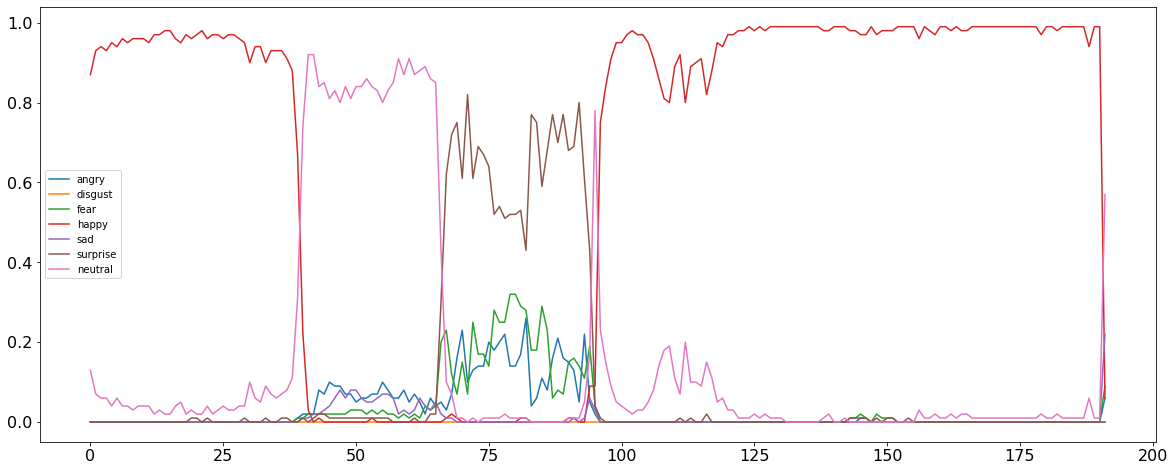

In [25]:
# We will now convert the analysed information into a dataframe.
# This will help us import the data as a .CSV file to perform analysis over it later
vid_df = input_video.to_pandas(processing_data)
vid_df = input_video.get_first_face(vid_df)
vid_df = input_video.get_emotions(vid_df)

# Plotting the emotions against time in the video
pltfig = vid_df.plot(figsize=(20, 8), fontsize=16).get_figure()

In [26]:
import numpy as np

# We will now work on the dataframe to extract which emotion was prominent in the video
angry = sum(vid_df.angry)
disgust = sum(vid_df.disgust)
fear = sum(vid_df.fear)
happy = sum(vid_df.happy)
sad = sum(vid_df.sad)
surprise = sum(vid_df.surprise)
neutral = sum(vid_df.neutral)

emotions_names = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
emotions_values = [angry, disgust, fear, happy, sad, surprise, neutral]

score_comparisons = pd.DataFrame(emotions_names, columns = ['Human Emotions'])
score_comparisons['Emotion Value from the Video'] = emotions_values
score_comparisons


,Human Emotions,Emotion Value from the Video
0,Angry,5.70
1,Disgust,0.00
2,Fear,6.22
3,Happy,129.65
4,Sad,1.56
5,Surprise,18.71
6,Neutral,29.65


AttributeError: 'DataFrame' object has no attribute 'column'

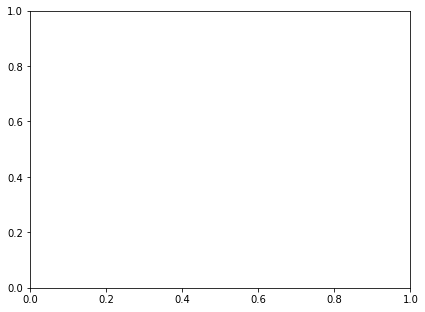

In [27]:
import transforms as transforms
from skimage import io
from skimage.transform import resize
from models import *


plt.rcParams['figure.figsize'] = (13.5,5.5)


plt.xlabel('Input Image', fontsize=16)
plt.tight_layout()

plt.subplots_adjust(left=0.05, bottom=0.2, right=0.95, top=0.9, hspace=0.02, wspace=0.3)
axes=plt.subplot(1, 2, 1)
color_list = ['red','orangered','darkorange','limegreen','darkgreen','royalblue','navy']
for i in range(len(emotions_names)):
    plt.bar(emotions_names[i], emotions_values[i], width = 0.5, color=color_list[i])
plt.title("Classification results ",fontsize=20)
plt.xlabel(" Expression Category ",fontsize=16)
plt.ylabel(" Classification Score ",fontsize=16)

max_val = emotions_values[0]
idx_max = 0

for i in range(len(emotions_values)):
    if emotions_values[i] > max_val:
        max_val = emotions_values[i] 
        idx_max = i
print("The dominant emotion is:", emotions_names[idx_max], " with a value of ", max_val)
axes=plt.subplot(1, 2, 2)
emojis_img = io.imread('images/emojis/%s.png' % idx_max)
plt.imshow(emojis_img)
plt.xlabel('Emoji Expression', fontsize=16)
axes.set_xticks([])
axes.set_yticks([])



In [29]:
print(Video.get_emotions(processing_data))

AttributeError: 'list' object has no attribute 'columns'